
# Pymaceuticals Inc.
---

### Analysis : you will be writing your analysis here
Capomulin and Ramicane had the smallest tummor size and volume and likely were the most effective drugs.
Capomulin had a gradule increase in tumor size before reducing the overall volume between 25-30 days.
There is a strong corelation between mouse weight and average tumor volume as the correlation factor is >0.7 (correlation=0.84).


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results,mouse_metadata, on="Mouse ID", how='left')

# Display the data table for preview
study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice.
number_mice=study_data_complete['Mouse ID'].nunique()
number_mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data=study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
mouse_data

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean=study_data_complete[study_data_complete['Mouse ID'].isin(mouse_data)==False]
study_data_clean['Mouse ID'].nunique()


248

In [10]:
study_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [11]:
# Checking the number of mice in the clean DataFrame.
study_data_clean['Mouse ID'].nunique()


248

In [12]:
study_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=study_data_clean.groupby('Drug Regimen').mean()
median=study_data_clean.groupby('Drug Regimen').median()
std_dev=study_data_clean.groupby('Drug Regimen').std()
variance=study_data_clean.groupby('Drug Regimen').var()
std_error= study_data_clean.groupby('Drug Regimen').sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
sum_stats=pd.DataFrame({'Mean Tumor Volume':mean['Tumor Volume (mm3)'],'Median Tumor Volume':median['Tumor Volume (mm3)'],'Tumor Volume Variance':variance['Tumor Volume (mm3)'],'Tumor Volume Std Dev':std_dev['Tumor Volume (mm3)'], 
                       'Total Volume Std. Err.':std_error['Tumor Volume (mm3)']})
sum_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Total Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#above


## Bar and Pie Charts

In [34]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
print (study_data_clean.groupby('Drug Regimen')['Mouse ID'].count())

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


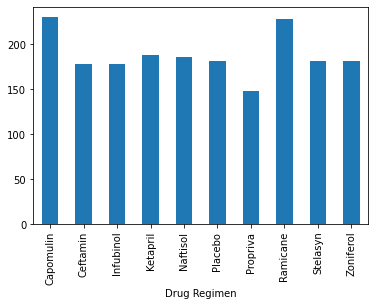

In [35]:
df=study_data_clean.groupby('Drug Regimen')['Mouse ID'].count()
df.plot(x='Drug Regimen', y=df[1], kind='bar')

Text(0, 0.5, 'Number of Unique Mice Tested')

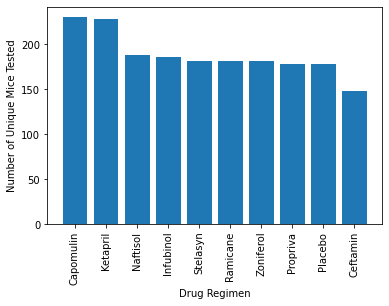

In [36]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
y_axis=(study_data_clean.groupby('Drug Regimen')['Mouse ID'].count()).sort_values(ascending=False)
plt.bar(study_data_clean['Drug Regimen'].unique(), y_axis, alpha=1,align='center')
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Unique Mice Tested")

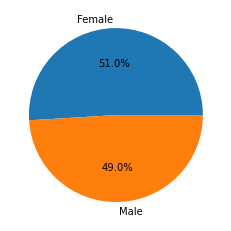

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels=['Female', 'Male']
count = study_data_clean['Sex'].value_counts()
explode = (0.1, 0)
plt.pie(count, labels=labels,autopct="%1.1f%%");
# (x, explode=None, labels=None, colors=None, 
# autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, 
# startangle=0, radius=1, counterclock=True, wedgeprops=None, 
# textprops=None, center=0, 0, frame=False, rotatelabels=False, *, 
# normalize=None, data=None)[source]¶

In [38]:
count

Male      958
Female    922
Name: Sex, dtype: int64

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#create data frame that holds last timepoint for each mouse, and mouse ID, reset index mouse id=column
max_timepoint=study_data_clean.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint=max_timepoint.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
study_data_merged=pd.merge(max_timepoint,study_data_clean, on=['Mouse ID', 'Timepoint'], how='left')
study_data_merged


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [40]:
#code given by instructor
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = study_data_merged.loc[study_data_merged["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


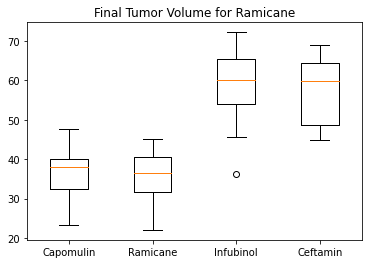

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume for Ramicane')
ax.boxplot(tumor_vol_list)
plt.xticks([1, 2, 3, 4],['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

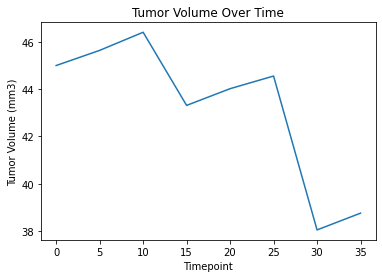

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse=study_data_clean.loc[(study_data_clean['Drug Regimen'] == 'Capomulin')]
capo_mouse
j246=capo_mouse.loc[(capo_mouse['Mouse ID']=='j246')]
j246
time=j246['Timepoint']
plt.plot(time, j246['Tumor Volume (mm3)'])
plt.title('Tumor Volume Over Time')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')



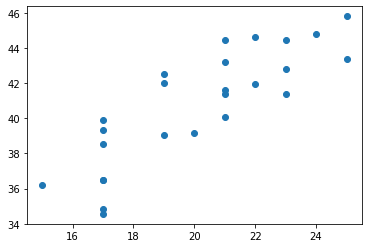

In [43]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_mouse1=capo_mouse.groupby('Mouse ID')
avg=capo_mouse1.mean()
avg_tumor=avg['Tumor Volume (mm3)']
x=avg['Weight (g)']
plt.scatter(x,avg_tumor)


In [44]:
capo_mouse1

## Correlation and Regression

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight=avg['Weight (g)']
tumor_vol=avg['Tumor Volume (mm3)']
correlation=st.pearsonr(weight,tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
# age = who_data.iloc[:,3]
# cell_phones = who_data.iloc[:,10]
# correlation = st.pearsonr(age,cell_phones)

The correlation between mouse weight and the average tumor volume is 0.84
